In [1]:
import random
import numpy
import math

import matplotlib.pyplot as plt

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
def my_evaluate(individual):
    
    size = len(individual)
    
    val = 0
    for i in range(size):
        if individual[i] != 0:
          val = val + math.pow(2, size-1 -i)
    return pow(val,2),

In [5]:
toolbox.register("evaluate", my_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
def main():
    random.seed(64)
    
    pop = toolbox.population(n=20)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=False)
    
    return pop, log, hof

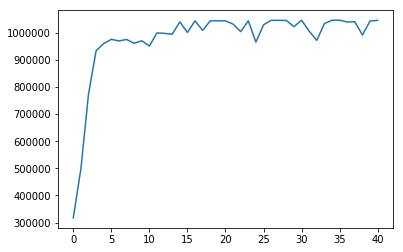

In [7]:
if __name__ == "__main__":
    results = main()
    avgs = []
    gens = []
    
    for item in results[1]:
        gens.append(item['gen'])
        avgs.append(item['avg'])

    plt.plot(gens, avgs)